[125.0, nan, nan, 68.0, 84.0, 96.0, 96.0, 104.0, 114.0, 120.0, 121.0, 121.0, 122.0, nan, 122.0, 125.0, nan, nan, 114.0, 120.0, 123.0, 123.0, 125.0, 125.0, 125.0, 125.0, 127.0, nan, 126.0, 128.0, 176.0, 188.0, nan, nan, nan, nan, 121.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 83.0, 84.0, 96.0, nan, 84.0, 94.0, 94.0, 188.0, nan, 121.0, nan, 84.0, nan, nan, 57.0, 62.0, 90.0, 92.0, 96.0, 107.0, 112.0, 119.0, 120.0, 126.0, nan, nan, nan, nan, nan, nan, nan, nan, 82.0, 96.0, 102.0, 112.0, 121.0, 124.0, 125.0, 127.0, nan, nan, nan, 80.0, 84.0, 120.0, 124.0, 128.0, nan, nan, nan, nan, nan, nan, nan, nan, 68.0, 84.0, 96.0, 97.0, 118.0, nan, nan, nan, nan, 83.0, 83.0, 84.0, 89.0, 96.0, 118.0, 121.0, 123.0, 125.0, 127.0, nan, 112.0, nan, 96.0, 188.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, 95.0, 96.0, nan, 39.0, 51.0, 84.0, nan, nan, 82.0, 84.0, 108.0, nan, nan, nan, 83.0, 84.0, 91.0, 93.0, 94.0, 96.0, 96.0, 106.0, 110.0, 121.0, 124.0, nan, 124.0, nan, 117.0, 122.0, nan, 

/Users/killaars/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/killaars/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


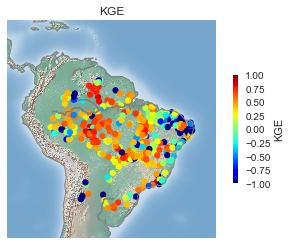

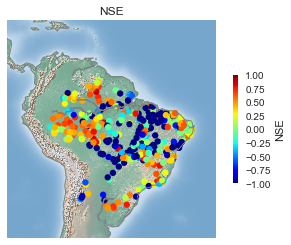

/Users/killaars/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


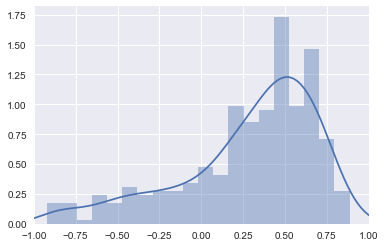

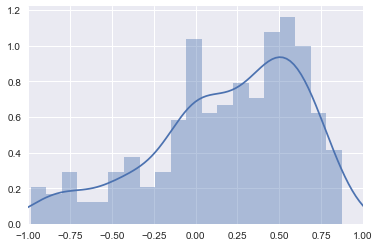

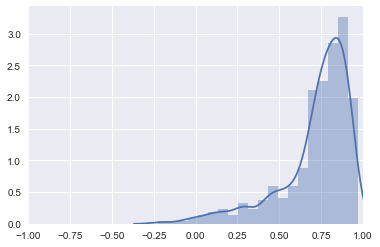

In [203]:
import numpy as np
import os,sys
import pandas as pd
import netCDF4 as nc
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import fileinput
%matplotlib inline

data = pd.read_csv('/Users/killaars/PhD/Elnino/Discharge/summary_MSWEP.txt',sep=";",index_col='id_from_grdc')

print(sorted(data['num_of_month_pairs'].values))
data=data[data['num_of_month_pairs']>12]
print(sorted(data['num_of_month_pairs'].values))
#print(data)
#sys.exit()
# plot KGE
# Plot locations on map
# Worldwide
# m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
#             llcrnrlon=-180,urcrnrlon=180,resolution='c')
# South America
m = Basemap(projection='stere',lon_0=-60,lat_0=-15.,lat_ts=50,\
                llcrnrlat=-35,urcrnrlat=20,\
                llcrnrlon=-90,urcrnrlon=-30,\
                rsphere=6371200.,resolution='c',area_thresh=10000)
m.drawcoastlines(color='.5')
m.shadedrelief()

x,y = m(data["model_longitude_in_arc_degree"].values, data["model_latitude_in_arc_degree"].values)                            # This is the step that transforms the data into the map's projection
#m.plot(x,y, 'bo', markersize=5)

# Color the transformed points!
sc = plt.scatter(x,y, c=data['kge_2012'].values, vmin=-1, vmax =1, cmap=plt.cm.get_cmap('jet'), s=40, edgecolors='none')
# And let's include that colorbar
cbar = plt.colorbar(sc, shrink = .5)
cbar.set_label("KGE")
plt.title('KGE')
#plt.savefig('/Users/killaars/PhD/Elnino/Discharge/locations_stations.png',dpi=100)
plt.show()

# plot NSE
# Plot locations on map
# Worldwide
# m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
#             llcrnrlon=-180,urcrnrlon=180,resolution='c')
# South America
m = Basemap(projection='stere',lon_0=-60,lat_0=-15.,lat_ts=50,\
                llcrnrlat=-35,urcrnrlat=20,\
                llcrnrlon=-90,urcrnrlon=-30,\
                rsphere=6371200.,resolution='c',area_thresh=10000)
m.drawcoastlines(color='.5')
m.shadedrelief()

x,y = m(data["model_longitude_in_arc_degree"].values, data["model_latitude_in_arc_degree"].values)                            # This is the step that transforms the data into the map's projection
#m.plot(x,y, 'bo', markersize=5)

# Color the transformed points!
sc = plt.scatter(x,y, c=data['ns_efficiency'].values, vmin=-1, vmax =1, cmap=plt.cm.get_cmap('jet'), s=40, edgecolors='none')
# And let's include that colorbar
cbar = plt.colorbar(sc, shrink = .5)
cbar.set_label("NSE")
plt.title('NSE')
#plt.savefig('/Users/killaars/PhD/Elnino/Discharge/locations_stations.png',dpi=100)
plt.show()

#sys.exit()
hist = data["kge_2012"].values[np.logical_not(np.isnan(data["kge_2012"].values))]
sns.distplot( hist[(hist >= -1) & (hist < 1)], bins=20 )
sns.plt.xlim(-1, 1)
plt.show()

hist = data["ns_efficiency"].values[np.logical_not(np.isnan(data["ns_efficiency"].values))]
sns.distplot( hist[(hist >= -1) & (hist < 1)], bins=20 )
sns.plt.xlim(-1, 1)
plt.show()

hist = data["correlation"].values[np.logical_not(np.isnan(data["correlation"].values))]
sns.distplot( hist[(hist >= -1) & (hist < 1)], bins=20 )
sns.plt.xlim(-1, 1)
plt.show()

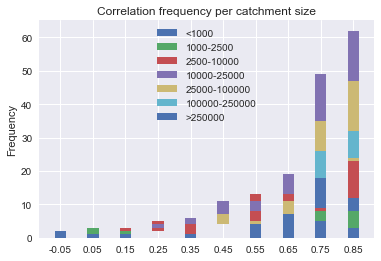

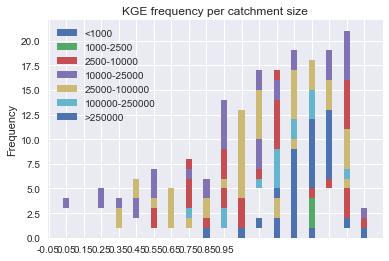

In [40]:
correlationplot = data['correlation'].groupby([pd.cut(data['correlation'],np.arange(-1,1,.10)),
                                    pd.cut(data['grdc_catchment_area_in_km2'],
                                           [0,1000,2500,10000,25000,100000,250000,10000000])]).agg({'count'}).unstack()

correlationplot.columns = ['<1000', '1000-2500','2500-10000','10000-25000','25000-100000','100000-250000','>250000']

catchment0=correlationplot['<1000'].values
catchment1=correlationplot['1000-2500'].values
catchment2=correlationplot['2500-10000'].values
catchment3=correlationplot['10000-25000'].values
catchment4=correlationplot['25000-100000'].values
catchment5=correlationplot['100000-250000'].values
catchment6=correlationplot['>250000'].values

N = len(correlationplot)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, catchment0, width)
p2 = plt.bar(ind, catchment1, width,bottom=catchment0)
p3 = plt.bar(ind, catchment2, width,bottom=catchment1)
p4 = plt.bar(ind, catchment3, width,bottom=catchment2)
p5 = plt.bar(ind, catchment4, width,bottom=catchment3)
p6 = plt.bar(ind, catchment5, width,bottom=catchment4)
p7 = plt.bar(ind, catchment6, width,bottom=catchment5)

plt.ylabel('Frequency')
plt.title('Correlation frequency per catchment size')
plt.xticks(ind, (np.arange(-0.05,1.05,0.1)))
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0]), ('<1000', '1000-2500','2500-10000',
                                                               '10000-25000','25000-100000','100000-250000',
                                                               '>250000'))

plt.show()

KGEplot = data['kge_2012'].groupby([pd.cut(data['kge_2012'],np.arange(-1,1,.10)),
                                    pd.cut(data['grdc_catchment_area_in_km2'],
                                           [0,1000,2500,10000,25000,100000,250000,10000000])]).agg({'count'}).unstack()

KGEplot.columns = ['<1000', '1000-2500','2500-10000','10000-25000','25000-100000','100000-250000','>250000']

KGE_catchment0=KGEplot['<1000'].values
KGE_catchment1=KGEplot['1000-2500'].values
KGE_catchment2=KGEplot['2500-10000'].values
KGE_catchment3=KGEplot['10000-25000'].values
KGE_catchment4=KGEplot['25000-100000'].values
KGE_catchment5=KGEplot['100000-250000'].values
KGE_catchment6=KGEplot['>250000'].values

N = len(KGEplot)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, KGE_catchment0, width)
p2 = plt.bar(ind, KGE_catchment1, width,bottom=KGE_catchment0)
p3 = plt.bar(ind, KGE_catchment2, width,bottom=KGE_catchment1)
p4 = plt.bar(ind, KGE_catchment3, width,bottom=KGE_catchment2)
p5 = plt.bar(ind, KGE_catchment4, width,bottom=KGE_catchment3)
p6 = plt.bar(ind, KGE_catchment5, width,bottom=KGE_catchment4)
p7 = plt.bar(ind, KGE_catchment6, width,bottom=KGE_catchment5)

plt.ylabel('Frequency')
plt.title('KGE frequency per catchment size')
plt.xticks(ind, (np.arange(-0.05,1.05,0.1)))
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0]), ('<1000', '1000-2500','2500-10000',
                                                               '10000-25000','25000-100000','100000-250000',
                                                               '>250000'))

plt.show()

[-8214.0439987000009, -3951.8145060100001, -2201.3961546999999, -1484.24731931, -1216.4307504000001, -1014.52473393, -694.27982639800007, -655.46084836699993, -178.42710365799999, -153.05195079700002, -109.12820990100001, -104.95216567999999, -78.298498104700002, -69.995456255899995, -64.586182650300003, -45.075848279600002, -32.835414378899998, -27.1481593681, -24.280359146399999, -23.094413809099997, -22.314331236100003, -22.1251683194, -17.869430484900001, -12.8167899029, -10.138801387300001, -9.9899557769100014, -9.5593431156899982, -9.0641192859899995, -8.9803846335300008, -8.8397123610600001, -8.60018110659, -8.4228652734900002, -8.1094745310100009, -7.4251754074899994, -7.3856561166999999, -6.8590744516099997, -6.7736977984399998, -6.0107058588199997, -5.2747196153900004, -5.1587436924599999, -4.7438419247400008, -4.4088151475000004, -4.0026562078600003, -3.6730063722000001, -3.2615473546200002, -2.9413300405299996, -2.21328047121, -2.0098687166799998, -1.94042696085, -1.8759223

/Users/killaars/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/killaars/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


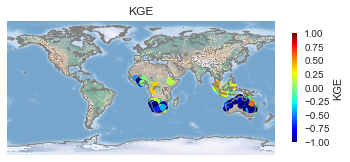

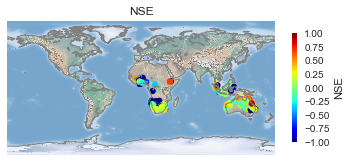

/Users/killaars/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


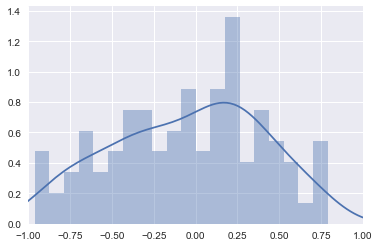

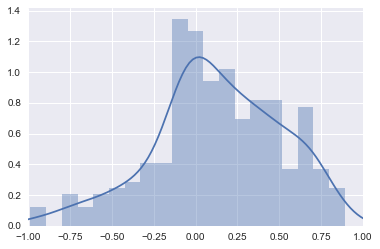

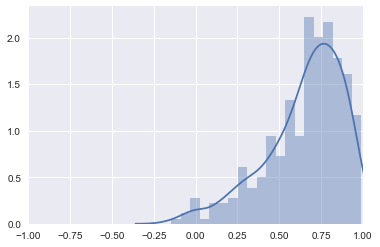

In [201]:
import numpy as np
import os,sys
import pandas as pd
import netCDF4 as nc
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import fileinput
%matplotlib inline

data = pd.read_csv('/Users/killaars/PhD/Elnino/Discharge/summary_othertropics_2000_2016.txt',sep=";",index_col='id_from_grdc')

data=data[data['num_of_month_pairs']>12]
print(sorted(data['ns_efficiency'].values))
#sys.exit()
# plot KGE
# Plot locations on map
# Worldwide
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
# South America
# m = Basemap(projection='stere',lon_0=-60,lat_0=-15.,lat_ts=50,\
#                 llcrnrlat=-35,urcrnrlat=20,\
#                 llcrnrlon=-90,urcrnrlon=-30,\
#                 rsphere=6371200.,resolution='c',area_thresh=10000)
m.drawcoastlines(color='.5')
m.shadedrelief()

x,y = m(data["model_longitude_in_arc_degree"].values, data["model_latitude_in_arc_degree"].values)                            # This is the step that transforms the data into the map's projection
#m.plot(x,y, 'bo', markersize=5)

# Color the transformed points!
sc = plt.scatter(x,y, c=data['kge_2012'].values, vmin=-1, vmax =1, cmap=plt.cm.get_cmap('jet'), s=40, edgecolors='none')
# And let's include that colorbar
cbar = plt.colorbar(sc, shrink = .5)
cbar.set_label("KGE")
plt.title('KGE')
#plt.savefig('/Users/killaars/PhD/Elnino/Discharge/locations_stations.png',dpi=100)
plt.show()

# plot NSE
# Plot locations on map
# Worldwide
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
# South America
# m = Basemap(projection='stere',lon_0=-60,lat_0=-15.,lat_ts=50,\
#                 llcrnrlat=-35,urcrnrlat=20,\
#                 llcrnrlon=-90,urcrnrlon=-30,\
#                 rsphere=6371200.,resolution='c',area_thresh=10000)
m.drawcoastlines(color='.5')
m.shadedrelief()

x,y = m(data["model_longitude_in_arc_degree"].values, data["model_latitude_in_arc_degree"].values)                            # This is the step that transforms the data into the map's projection
#m.plot(x,y, 'bo', markersize=5)

# Color the transformed points!
sc = plt.scatter(x,y, c=data['ns_efficiency'].values, vmin=-1, vmax =1, cmap=plt.cm.get_cmap('jet'), s=40, edgecolors='none')
# And let's include that colorbar
cbar = plt.colorbar(sc, shrink = .5)
cbar.set_label("NSE")
plt.title('NSE')
#plt.savefig('/Users/killaars/PhD/Elnino/Discharge/locations_stations.png',dpi=100)
plt.show()

#sys.exit()
hist = data["kge_2012"].values[np.logical_not(np.isnan(data["kge_2012"].values))]
sns.distplot( hist[(hist >= -1) & (hist < 1)], bins=20 )
sns.plt.xlim(-1, 1)
plt.show()

hist = data["ns_efficiency"].values[np.logical_not(np.isnan(data["ns_efficiency"].values))]
sns.distplot( hist[(hist >= -1) & (hist < 1)], bins=20 )
sns.plt.xlim(-1, 1)
plt.show()

hist = data["correlation"].values[np.logical_not(np.isnan(data["correlation"].values))]
sns.distplot( hist[(hist >= -1) & (hist < 1)], bins=20 )
sns.plt.xlim(-1, 1)
plt.show()

[nan, 19.0, 58.0, 74.0, nan, nan, nan, nan, nan, 43.0, nan, nan, nan, 26.0, nan, nan, nan, nan, nan, 53.0, nan, nan, nan, nan, nan, 20.0, 69.0, nan, nan, nan, nan, 56.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 82.0, 83.0, nan, 83.0, 84.0, nan, 10.0, 25.0, nan, nan, nan, nan, 52.0, 84.0, nan, nan, nan, 16.0, nan, nan, nan, nan, nan, nan, nan, 25.0, 73.0, nan, nan, nan, 83.0, nan, nan, nan, nan, 80.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 82.0, 84.0, nan, nan, nan, nan, nan, nan, nan, nan, 12.0, 20.0, 65.0, 81.0, nan, 63.0, nan, nan, 82.0, 84.0, nan, nan, nan, 80.0, nan, nan, 10.0, 18.0, 84.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 11.0, 18.0, 76.0, 82.0, 84.0, nan, 84.0, nan, nan, nan, nan, nan, nan, 42.0, 84.0, nan, nan, nan, 73.0, 81.0, 84.0, nan, nan, nan, nan, 43.0, nan, nan, nan, nan, nan, nan, 25.0, 84.0, nan, nan, 80.0, 83.0, 84.0, nan, nan, 77.0, 83.0, nan, nan, nan, nan, nan, nan, 17.0, 40.0, nan, nan, nan, nan, nan, nan

/Users/killaars/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/killaars/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


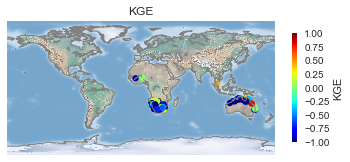

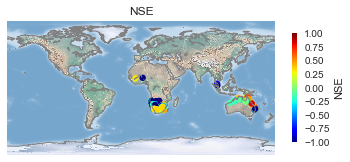

/Users/killaars/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


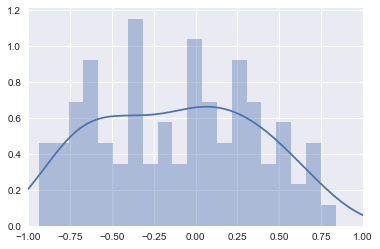

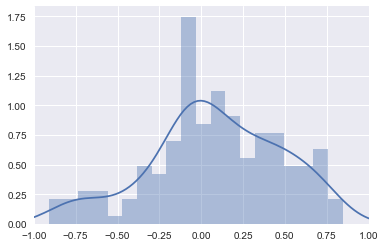

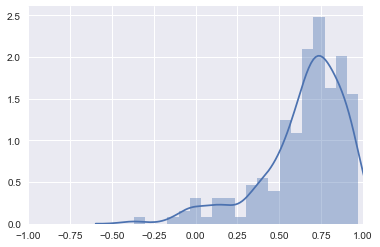

In [52]:
import numpy as np
import os,sys
import pandas as pd
import netCDF4 as nc
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import fileinput
%matplotlib inline

data = pd.read_csv('/Users/killaars/PhD/Elnino/Discharge/summary_othertropics.txt',sep=";",index_col='id_from_grdc')

print(sorted(data['num_of_month_pairs'].values))
data=data[data['num_of_month_pairs']>12]
print(sorted(data['num_of_month_pairs'].values))
#sys.exit()
# plot KGE
# Plot locations on map
# Worldwide
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
# South America
# m = Basemap(projection='stere',lon_0=-60,lat_0=-15.,lat_ts=50,\
#                 llcrnrlat=-35,urcrnrlat=20,\
#                 llcrnrlon=-90,urcrnrlon=-30,\
#                 rsphere=6371200.,resolution='c',area_thresh=10000)
m.drawcoastlines(color='.5')
m.shadedrelief()

x,y = m(data["model_longitude_in_arc_degree"].values, data["model_latitude_in_arc_degree"].values)                            # This is the step that transforms the data into the map's projection
#m.plot(x,y, 'bo', markersize=5)

# Color the transformed points!
sc = plt.scatter(x,y, c=data['kge_2012'].values, vmin=-1, vmax =1, cmap=plt.cm.get_cmap('jet'), s=40, edgecolors='none')
# And let's include that colorbar
cbar = plt.colorbar(sc, shrink = .5)
cbar.set_label("KGE")
plt.title('KGE')
#plt.savefig('/Users/killaars/PhD/Elnino/Discharge/locations_stations.png',dpi=100)
plt.show()

# plot NSE
# Plot locations on map
# Worldwide
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
# South America
# m = Basemap(projection='stere',lon_0=-60,lat_0=-15.,lat_ts=50,\
#                 llcrnrlat=-35,urcrnrlat=20,\
#                 llcrnrlon=-90,urcrnrlon=-30,\
#                 rsphere=6371200.,resolution='c',area_thresh=10000)
m.drawcoastlines(color='.5')
m.shadedrelief()

x,y = m(data["model_longitude_in_arc_degree"].values, data["model_latitude_in_arc_degree"].values)                            # This is the step that transforms the data into the map's projection
#m.plot(x,y, 'bo', markersize=5)

# Color the transformed points!
sc = plt.scatter(x,y, c=data['ns_efficiency'].values, vmin=-1, vmax =1, cmap=plt.cm.get_cmap('jet'), s=40, edgecolors='none')
# And let's include that colorbar
cbar = plt.colorbar(sc, shrink = .5)
cbar.set_label("NSE")
plt.title('NSE')
#plt.savefig('/Users/killaars/PhD/Elnino/Discharge/locations_stations.png',dpi=100)
plt.show()

#sys.exit()
hist = data["kge_2012"].values[np.logical_not(np.isnan(data["kge_2012"].values))]
sns.distplot( hist[(hist >= -1) & (hist < 1)], bins=20 )
sns.plt.xlim(-1, 1)
plt.show()

hist = data["ns_efficiency"].values[np.logical_not(np.isnan(data["ns_efficiency"].values))]
sns.distplot( hist[(hist >= -1) & (hist < 1)], bins=20 )
sns.plt.xlim(-1, 1)
plt.show()

hist = data["correlation"].values[np.logical_not(np.isnan(data["correlation"].values))]
sns.distplot( hist[(hist >= -1) & (hist < 1)], bins=20 )
sns.plt.xlim(-1, 1)
plt.show()

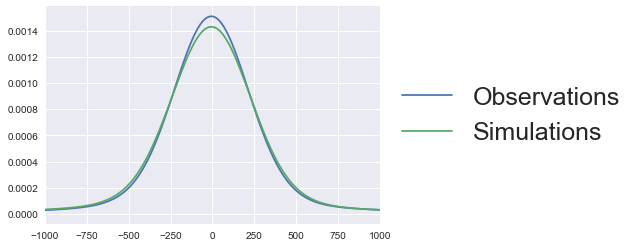

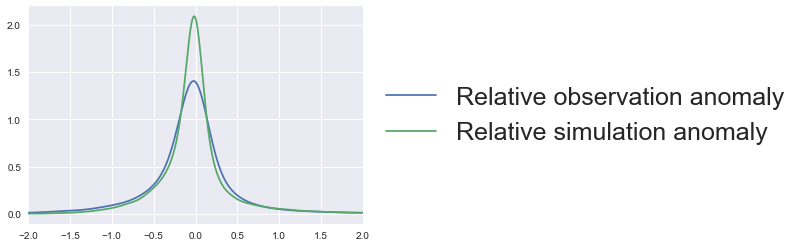

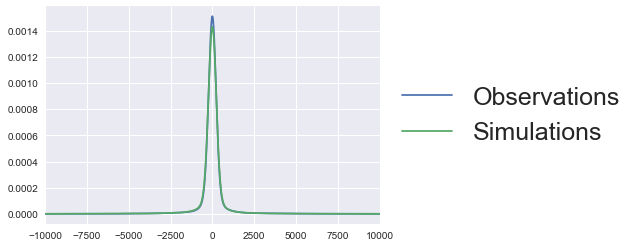

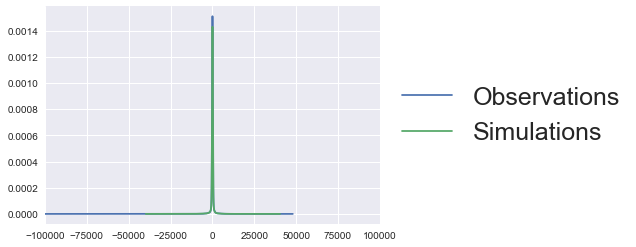

In [194]:
# Monthly Anomaly correlation
obs_ano=[]
sim_ano=[]
obs_rel_ano=[]
sim_rel_ano=[]
path='/Users/killaars/PhD/Elnino/Discharge/grdc/MSWEP_AMA/'
for file in os.listdir(path):
    if file.endswith('.txt'):
        #print(file)
        data_ano = pd.read_csv(os.path.join(path,file),sep=";",skiprows=3)
        f=open(os.path.join(path,file))
        text=f.readlines(0)
        for t in text:
            if t.endswith('.mon\n'):
                station=t.split("/")[-1]
                grdc_id=station[0:7]
        data_ano=data_ano.dropna()
        data_ano['date'] = pd.to_datetime(data_ano['date'])
        data_ano=data_ano.set_index('date')
        month_mean=data_ano.groupby([data_ano.index.month]).mean()
        #print(month_mean)
        for index in data_ano.index.values:
            #print(index)
            month=pd.to_datetime(index).month
            data_ano.loc[index,'observation_anomaly']=data_ano.loc[index,'observation']-month_mean.loc[int(month),'observation']
            data_ano.loc[index,'simulated_anomaly']=data_ano.loc[index,'simulation']-month_mean.loc[int(month),'simulation']
            data_ano['obs_relative_anomaly']=data_ano['observation_anomaly']/data_ano['observation'].mean()
            data_ano['sim_relative_anomaly']=data_ano['simulated_anomaly']/data_ano['simulation'].mean()
        #print(data_ano)
        obs_ano=np.append(obs_ano,data_ano['observation_anomaly'].values)        
        sim_ano=np.append(sim_ano,data_ano['simulated_anomaly'].values)
        obs_rel_ano=np.append(obs_rel_ano,data_ano['obs_relative_anomaly'].values)        
        sim_rel_ano=np.append(sim_rel_ano,data_ano['sim_relative_anomaly'].values)
        #print(obs_ano)
        #print(sim_ano)
        anomaly_correlation=data_ano.corr()
        #print(anomaly_correlation.iloc[2,3])
        data.loc[int(grdc_id),'anomaly_correlation']=anomaly_correlation.iloc[2,3]
        

from scipy.stats.kde import gaussian_kde
# this create the kernel, given an array it will estimate the probability over that values
kde_obs = gaussian_kde(obs_ano)
kde_sim = gaussian_kde(sim_ano)
kde_rel_obs = gaussian_kde(obs_rel_ano)
kde_rel_sim = gaussian_kde(sim_rel_ano)
# these are the values over wich your kernel will be evaluated
dist_space_obs = np.linspace(min(obs_ano), max(obs_ano),10000)
dist_space_sim = np.linspace(min(sim_ano), max(sim_ano),10000)
dist_space_rel_obs = np.linspace(min(obs_rel_ano), max(obs_rel_ano),10000)
dist_space_rel_sim = np.linspace(min(sim_rel_ano), max(sim_rel_ano),10000)
# plot the results
fig, axes = plt.subplots(nrows=1, ncols=1)
plt.plot( dist_space_obs, kde_obs(dist_space_obs),label='Observations' )
plt.plot( dist_space_sim, kde_sim(dist_space_sim),label='Simulations' )
plt.xlim(-1000,1000)
lgd=plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=25)
#title='/Users/killaars/PhD/Elnino/Discharge/grdc/MSWEP_AMA/plots/%s_%s.png' %(grdc_id,str(anomaly_correlation.iloc[2,3]))
#plt.savefig(title,dpi=100, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=1)
plt.plot( dist_space_rel_obs, kde_rel_obs(dist_space_rel_obs),label='Relative observation anomaly' )
plt.plot( dist_space_rel_sim, kde_rel_sim(dist_space_rel_sim),label='Relative simulation anomaly' )
plt.xlim(-2,2)
lgd=plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=25)
#title='/Users/killaars/PhD/Elnino/Discharge/grdc/MSWEP_AMA/plots/%s_%s.png' %(grdc_id,str(anomaly_correlation.iloc[2,3]))
#plt.savefig(title,dpi=100, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=1)
plt.plot( dist_space_obs, kde_obs(dist_space_obs),label='Observations' )
plt.plot( dist_space_sim, kde_sim(dist_space_sim),label='Simulations' )
plt.xlim(-10000,10000)
lgd=plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=25)
#title='/Users/killaars/PhD/Elnino/Discharge/grdc/MSWEP_AMA/plots/%s_%s.png' %(grdc_id,str(anomaly_correlation.iloc[2,3]))
#plt.savefig(title,dpi=100, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()  

fig, axes = plt.subplots(nrows=1, ncols=1)
plt.plot( dist_space_obs, kde_obs(dist_space_obs),label='Observations' )
plt.plot( dist_space_sim, kde_sim(dist_space_sim),label='Simulations' )
plt.xlim(-100000,100000)
lgd=plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=25)
#title='/Users/killaars/PhD/Elnino/Discharge/grdc/MSWEP_AMA/plots/%s_%s.png' %(grdc_id,str(anomaly_correlation.iloc[2,3]))
#plt.savefig(title,dpi=100, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()  
#print(data)
#sys.exit()

In [195]:
print(np.std(obs_ano))
print(np.std(sim_ano))
print(np.std(obs_rel_ano))
print(np.std(sim_rel_ano))

1735.9051082
1839.77492223
1.14355370471
0.609607017385


/Users/killaars/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/killaars/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


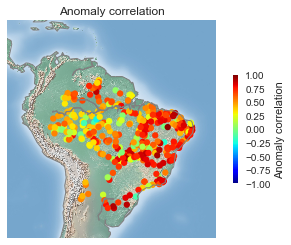

/Users/killaars/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


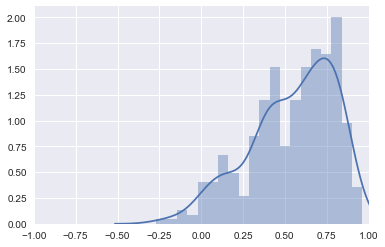

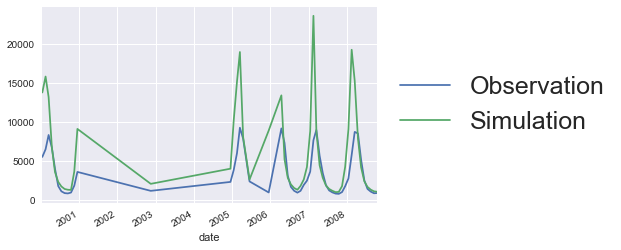

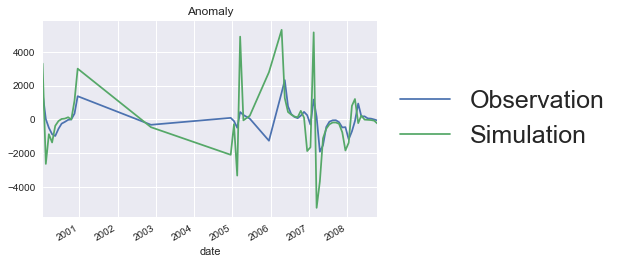

0.538511422281


<function matplotlib.pyplot.show>

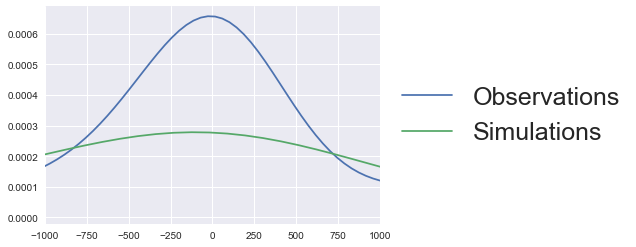

In [183]:
# plot NSE
# Plot locations on map
# Worldwide
# m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
#             llcrnrlon=-180,urcrnrlon=180,resolution='c')
# South America
m = Basemap(projection='stere',lon_0=-60,lat_0=-15.,lat_ts=50,\
                llcrnrlat=-35,urcrnrlat=20,\
                llcrnrlon=-90,urcrnrlon=-30,\
                rsphere=6371200.,resolution='c',area_thresh=10000)
m.drawcoastlines(color='.5')
m.shadedrelief()

x,y = m(data["model_longitude_in_arc_degree"].values, data["model_latitude_in_arc_degree"].values)                            # This is the step that transforms the data into the map's projection
#m.plot(x,y, 'bo', markersize=5)

# Color the transformed points!
sc = plt.scatter(x,y, c=data['anomaly_correlation'].values, vmin=-1, vmax =1, cmap=plt.cm.get_cmap('jet'), s=40, edgecolors='none')
# And let's include that colorbar
cbar = plt.colorbar(sc, shrink = .5)
cbar.set_label("Anomaly correlation")
plt.title('Anomaly correlation')
#plt.savefig('/Users/killaars/PhD/Elnino/Discharge/locations_stations.png',dpi=100)
plt.show()

hist = data["anomaly_correlation"].values[np.logical_not(np.isnan(data["anomaly_correlation"].values))]
sns.distplot( hist[(hist >= -1) & (hist < 1)], bins=20 )
sns.plt.xlim(-1, 1)
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=1)
data_ano['observation'].plot(title='',label='Observation')
data_ano['simulation'].plot(label='Simulation')
lgd=plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=25)
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=1)
data_ano['observation_anomaly'].plot(title='Anomaly',label='Observation')
data_ano['simulated_anomaly'].plot(label='Simulation')
lgd=plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=25)
plt.show()


print(anomaly_correlation.iloc[2,3])
from scipy.stats.kde import gaussian_kde
# this create the kernel, given an array it will estimate the probability over that values
kde_obs = gaussian_kde(data_ano['observation_anomaly'])
kde_sim = gaussian_kde(data_ano['simulated_anomaly'])
# these are the values over wich your kernel will be evaluated
dist_space_obs = np.linspace(min(data_ano['observation_anomaly']), max(data_ano['observation_anomaly']),100)
dist_space_sim = np.linspace(min(data_ano['simulated_anomaly']), max(data_ano['simulated_anomaly']),100)
# plot the results
plt.plot( dist_space_obs, kde_obs(dist_space_obs),label='Observations' )
plt.plot( dist_space_sim, kde_sim(dist_space_sim),label='Simulations' )
plt.xlim(-1000,1000)
lgd=plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=25)
plt.show

In [197]:
print(sorted(data["anomaly_correlation"].values))

[-0.267598845620863, -0.20166721777994967, -0.13468622747726705, -0.13298158153318654, -0.11873976728813401, -0.049189637425691525, -0.029418273031996234, -0.010458791289818822, -0.0081866512945733775, -0.0055620951527020693, -0.0021616235785298682, 0.013750006640715842, 0.014233230495941999, 0.018150057965607161, 0.025919754436602452, 0.029236036550554331, 0.040694660210397478, 0.042753639153022445, 0.047459341472677642, 0.05019227722595395, 0.072135551950550311, 0.075992679906122171, 0.092559274318931004, 0.094875603624602844, 0.099964673926140737, 0.10451187414805298, 0.10733548579757175, 0.1148893099857712, 0.11644106039171127, 0.11857781173519698, 0.12312271474049986, 0.12669296321813045, 0.12770559990400385, 0.12972820025954537, 0.13790439435186769, 0.15529975191160414, 0.15819971682754944, 0.16004867206052498, 0.16193120780510589, 0.1624000396552393, 0.16850321124680057, 0.16974404481106289, 0.17789895780246179, 0.18303118819375142, 0.19410783748161703, 0.19439916580780103, 0.19